<h1 style="text-align:center">Project Work</h1>
<h3 style="text-align:center">TKO_7093 Statistical Data Analysis - autumn 2024 </h3>

<hr style="height:4px; background-color:#333; border:none;" />


           

**Author: Ghufran Ullah \
Student ID: 2411327**
<hr style="height:4px; background-color:#333; border:none;" />

### Importing Libraries and Dataset

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import spearmanr

In [2]:
# creating a data frame for processing
df = pd.read_csv('habits.data', sep=';')

In [3]:
df.head()

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,V1,V5,V7,V21,...,V40,V68,V69,V70,V75,H1a_A,H1b_A,H1g_A,H1h_A,H1i_A
0,50002,1,2,1,1.0,6,380,10,0,0,...,0,10,0,130,0,2.0,2.0,1.0,1.0,1.0
1,50002,2,2,2,1.0,6,470,20,10,0,...,0,40,0,0,0,1.0,2.0,1.0,1.0,1.0
2,50009,1,2,2,1.0,7,350,30,10,0,...,0,80,0,120,0,1.0,1.0,2.0,1.0,1.0
3,50011,1,2,2,3.0,4,360,20,0,0,...,0,0,0,20,0,1.0,1.0,1.0,1.0,1.0
4,50012,1,1,2,1.0,8,0,50,70,0,...,0,10,0,350,0,2.0,1.0,1.0,2.0,2.0


### Description of Variables

1. kohde: household ID 
2. jasen: member ID
3. pvknro: day of week (1 = working day | 2 = weekend )
4. sp: sex ( 1 = male | 2 = female )
5. IKAL1: age group
6. ASALUE: living environment ( 1 = city | 2 = municipality | 3 = rural area )
7. V1: **Working** Time spent on activities (measured in minutes)
8. V21: **childcare** Time spent on activities (measured in minutes)
9. V22: **reading and playing with children** Time spent on activities (measured in minutes)
10. V5: **cooking** Time spent on activities (measured in minutes)
11. H1a_A: **cinema** Place visited in past 12 months (1 = yes | 2 = no )
12. H1b_A: **theater** Place visited in past 12 months (1 = yes | 2 = no )

In [4]:
#filtering out the specific variable required for the analysis
df1 = df.filter(['kohde', 'jasen', 'pvknro', 'sp', 'IKAL1', 'ASALUE', 'V1', 'V5', 'V21', 'V22', 'H1a_A', 'H1b_A'], axis=1)

In [5]:
df1.head(50)

,kohde,jasen,pvknro,sp,IKAL1,ASALUE,V1,V5,V21,V22,H1a_A,H1b_A
0,50002,1,2,1,6,1.0,380,10,0,0,2.0,2.0
1,50002,2,2,2,6,1.0,470,20,0,0,1.0,2.0
2,50009,1,2,2,7,1.0,350,30,0,0,1.0,1.0
3,50011,1,2,2,4,3.0,360,20,0,0,1.0,1.0
4,50012,1,1,2,8,1.0,0,50,0,0,2.0,1.0
5,50015,1,1,1,8,3.0,0,10,0,0,2.0,1.0
6,50015,2,1,2,8,3.0,0,30,0,0,2.0,1.0
7,50022,1,1,2,6,1.0,480,20,30,0,2.0,2.0
8,50024,1,2,1,4,1.0,680,0,30,0,2.0,2.0
9,50030,1,2,1,6,2.0,0,30,0,0,1.0,1.0


### Data Cleaning and Preprocessing
From above we can see that there are multiple problems in the dataset:
1. Format of time is different as the time is in mins for the V1, V5, V21, V22.
2. Absurd/Erroneous values in H1a_A	H1b_A
3. Different data types


##### 1. Formatting of time

In [6]:
# Function to convert mm:ss to float minutes
def convert_time(value):
    try:
        if isinstance(value, str) and ':' in value:
            min,sec = value.split(':')
            total_mins = float(mins) + float(sec)/60
            return round(total_mins, 1)
        else:
            return round(float(value), 1)
    except:
        return 0.0   # If conversion fails, set as NaN

In [7]:
time_columns = ['V1', 'V5', 'V21', 'V22']

for col in time_columns:
    df1[col] = df1[col].apply(convert_time)

In [8]:
df1.head(20)

,kohde,jasen,pvknro,sp,IKAL1,ASALUE,V1,V5,V21,V22,H1a_A,H1b_A
0,50002,1,2,1,6,1.0,380.0,10.0,0.0,0.0,2.0,2.0
1,50002,2,2,2,6,1.0,470.0,20.0,0.0,0.0,1.0,2.0
2,50009,1,2,2,7,1.0,350.0,30.0,0.0,0.0,1.0,1.0
3,50011,1,2,2,4,3.0,360.0,20.0,0.0,0.0,1.0,1.0
4,50012,1,1,2,8,1.0,0.0,50.0,0.0,0.0,2.0,1.0
5,50015,1,1,1,8,3.0,0.0,10.0,0.0,0.0,2.0,1.0
6,50015,2,1,2,8,3.0,0.0,30.0,0.0,0.0,2.0,1.0
7,50022,1,1,2,6,1.0,480.0,20.0,30.0,0.0,2.0,2.0
8,50024,1,2,1,4,1.0,680.0,0.0,30.0,0.0,2.0,2.0
9,50030,1,2,1,6,2.0,0.0,30.0,0.0,0.0,1.0,1.0


##### 2. Absurd/Erroneous values in H1a_A	H1b_A

In [9]:
# data cleaning
# Replace invalid values in H1a_A and H1b_A with NaN
df1['H1a_A'] = pd.to_numeric(df1['H1a_A'], errors='coerce')
df1['H1b_A'] = pd.to_numeric(df1['H1b_A'], errors='coerce')

In [10]:
# Filtering to keep only valid values (1 or 2). This will keep the rest of the row but sets H1a_A/H1b_A to NaN if invalid
df1.loc[~df1['H1a_A'].isin([1, 2]), 'H1a_A'] = np.nan
df1.loc[~df1['H1b_A'].isin([1, 2]), 'H1b_A'] = np.nan

In [11]:
df1.head(50)

,kohde,jasen,pvknro,sp,IKAL1,ASALUE,V1,V5,V21,V22,H1a_A,H1b_A
0,50002,1,2,1,6,1.0,380.0,10.0,0.0,0.0,2.0,2.0
1,50002,2,2,2,6,1.0,470.0,20.0,0.0,0.0,1.0,2.0
2,50009,1,2,2,7,1.0,350.0,30.0,0.0,0.0,1.0,1.0
3,50011,1,2,2,4,3.0,360.0,20.0,0.0,0.0,1.0,1.0
4,50012,1,1,2,8,1.0,0.0,50.0,0.0,0.0,2.0,1.0
5,50015,1,1,1,8,3.0,0.0,10.0,0.0,0.0,2.0,1.0
6,50015,2,1,2,8,3.0,0.0,30.0,0.0,0.0,2.0,1.0
7,50022,1,1,2,6,1.0,480.0,20.0,30.0,0.0,2.0,2.0
8,50024,1,2,1,4,1.0,680.0,0.0,30.0,0.0,2.0,2.0
9,50030,1,2,1,6,2.0,0.0,30.0,0.0,0.0,1.0,1.0


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kohde   780 non-null    int64  
 1   jasen   780 non-null    int64  
 2   pvknro  780 non-null    int64  
 3   sp      780 non-null    int64  
 4   IKAL1   780 non-null    int64  
 5   ASALUE  780 non-null    float64
 6   V1      780 non-null    float64
 7   V5      780 non-null    float64
 8   V21     780 non-null    float64
 9   V22     780 non-null    float64
 10  H1a_A   720 non-null    float64
 11  H1b_A   722 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 73.2 KB


##### 3. Data Type Conversion

In [13]:
# Data Type Conversion

# Convert binary columns to integer (nullable to allow for NaNs)
df1['H1a_A'] = df1['H1a_A'].astype('Int64')
df1['H1b_A'] = df1['H1b_A'].astype('Int64')

# Convert ordinal/categorical variables to 'category' dtype
ordinal_cols = ['IKAL1', 'ASALUE', 'sp', 'pvknro']
for col in ordinal_cols:
    df1[col] = df1[col].astype('category')


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   kohde   780 non-null    int64   
 1   jasen   780 non-null    int64   
 2   pvknro  780 non-null    category
 3   sp      780 non-null    category
 4   IKAL1   780 non-null    category
 5   ASALUE  780 non-null    category
 6   V1      780 non-null    float64 
 7   V5      780 non-null    float64 
 8   V21     780 non-null    float64 
 9   V22     780 non-null    float64 
 10  H1a_A   720 non-null    Int64   
 11  H1b_A   722 non-null    Int64   
dtypes: Int64(2), category(4), float64(4), int64(2)
memory usage: 54.2 KB


In [15]:
df1.describe()

,kohde,jasen,V1,V5,V21,V22,H1a_A,H1b_A
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,720.000000,722.000000
mean,51012.921795,1.403846,91.243590,29.987179,9.102564,5.064103,1.500000,1.500000
std,584.776648,0.490982,190.747781,37.167005,34.707133,23.822644,0.500348,0.500347
min,50002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,50501.750000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,51043.000000,1.000000,0.000000,20.000000,0.000000,0.000000,1.500000,1.500000
75%,51517.000000,2.000000,0.000000,50.000000,0.000000,0.000000,2.000000,2.000000
max,51982.000000,2.000000,1150.000000,270.000000,300.000000,240.000000,2.000000,2.000000


In [16]:
df1[['V1', 'V5', 'V21', 'V22']].median()

V1      0.0
V5     20.0
V21     0.0
V22     0.0
dtype: float64

<hr style="height:4px; background-color:#333; border:none;" />


## Question 1: Characterise the individuals that are present in the data. Are there groups of similar persons?


### Objective of this question

The goal here is to determine whether the individuals in the dataset could be meaningfully characterised and grouped based on their demographic attributes. Specifically, we will explore whether there exist distinct subgroups of individuals who share similar profiles in terms of age (IKAL1), gender (sp), and living environment (ASALUE).

In [17]:
# Selecting relevant demographic variables
features = ['IKAL1', 'sp', 'ASALUE']
x = df1[features].copy()

In [18]:
x

,IKAL1,sp,ASALUE
0,6,1,1.0
1,6,2,1.0
2,7,2,1.0
3,4,2,3.0
4,8,2,1.0
...,...,...,...
775,6,2,2.0
776,5,2,1.0
777,5,1,1.0
778,6,2,1.0


In [19]:
# Standardizing the data
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [20]:
print(x_scaled)

[[-0.10078891 -1.04190283 -0.65809311]
 [-0.10078891  0.95978241 -0.65809311]
 [ 0.52314242  0.95978241 -0.65809311]
 ...
 [-0.72472023 -1.04190283 -0.65809311]
 [-0.10078891  0.95978241 -0.65809311]
 [-0.72472023 -1.04190283 -0.65809311]]


In [21]:
# applying PCA for dimensionality reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [22]:
print(x_pca)

[[-0.03331495 -1.1905918 ]
 [-0.89411394  0.61366504]
 [-0.49238603  0.7800026 ]
 ...
 [-0.43504287 -1.35692936]
 [-0.89411394  0.61366504]
 [-0.43504287 -1.35692936]]


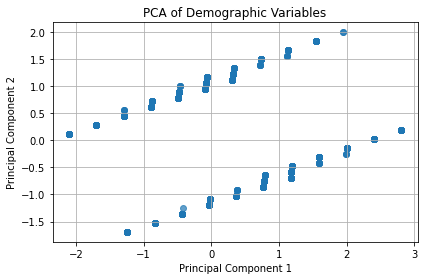

In [23]:
# Visualize PCA
plt.figure(figsize=(6,4))
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Demographic Variables')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters = 3, random_state = 0)
clusters = kmeans.fit_predict(x_scaled)

df1['cluster'] = clusters

In [25]:
df1.head()

,kohde,jasen,pvknro,sp,IKAL1,ASALUE,V1,V5,V21,V22,H1a_A,H1b_A,cluster
0,50002,1,2,1,6,1.0,380.0,10.0,0.0,0.0,2,2,1
1,50002,2,2,2,6,1.0,470.0,20.0,0.0,0.0,1,2,0
2,50009,1,2,2,7,1.0,350.0,30.0,0.0,0.0,1,1,0
3,50011,1,2,2,4,3.0,360.0,20.0,0.0,0.0,1,1,2
4,50012,1,1,2,8,1.0,0.0,50.0,0.0,0.0,2,1,0


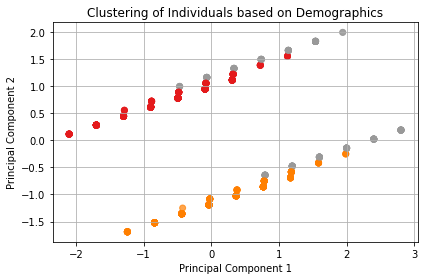

In [26]:
# Plotting 
plt.figure(figsize=(6,4))
plt.scatter(x_pca[:,0], x_pca[:,1], c=clusters, cmap='Set1', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of Individuals based on Demographics')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observation from above PCA

From looking at the PCA with K-Means clustering, it groups the data into three distinct clusters, which are visually represented above using different colors. These clusters show noticeable separation along the first principal component axis, which suggests that this dimension captures the most relevant differences among individuals—likely related to key demographic characteristics such as age or maybe living environment. While the boundaries between clusters are not sharply defined, there is a general pattern of separation that gives insight into how the data is structured.

On closer interpretation, the top cluster may represent individuals with similar traits, such as younger age groups or urban residents. The lower cluster could correspond to older individuals or those from rural areas, while the middle cluster seems to represent a mix of demographic profiles or transitional groups. The clustering quality appears moderate, which is expected when using a limited set of categorical demographic variables.

In [27]:
# Just out of curiosity I wanted to play with clustring abit more......
# Printing the number of individuals per cluster:

print("\n--- Number of individuals per cluster ---")
print(df1['cluster'].value_counts())


--- Number of individuals per cluster ---
0    339
1    304
2    137
Name: cluster, dtype: int64


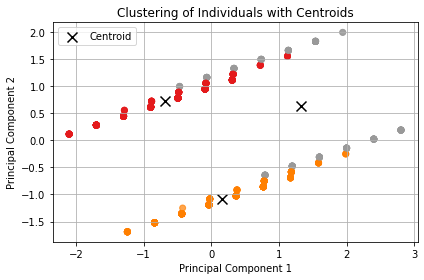

In [28]:
# Adding cluster labels and centroids to the PCA plot [1]

plt.figure(figsize=(6,4))
plt.scatter(x_pca[:, 0] ,x_pca[:, 1] ,cmap = 'Set1', c=clusters, alpha=0.7)

# Calculate centroid in the PCA
centroid = kmeans.cluster_centers_
centorid_pca = pca.transform(centroid)

plt.scatter(centorid_pca[:,0], centorid_pca[:, 1], c='black', alpha=1, marker='x', s=100, label='Centroid')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of Individuals with Centroids')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [29]:
###### Trying to analyze what each cluster represents demographically
print("\n Demographic breakdown per cluster")
demographics = ['IKAL1', 'sp' ,'ASALUE']

for d in demographics:
    print(f"\nBreakdown of '{d}'' by Clusters: ")
    print(df1.groupby('cluster')[d].value_counts(normalize=True).unstack().round(3))


 Demographic breakdown per cluster

Breakdown of 'IKAL1'' by Clusters: 
             3      4      5      6      7      8      9
cluster                                                 
0        0.044  0.124  0.192  0.227  0.218  0.109  0.086
1        0.049  0.145  0.155  0.220  0.224  0.148  0.059
2        0.029  0.146  0.146  0.190  0.168  0.219  0.102

Breakdown of 'sp'' by Clusters: 
             1      2
cluster              
0        0.000  1.000
1        1.000  0.000
2        0.511  0.489

Breakdown of 'ASALUE'' by Clusters: 
           1.0    2.0  3.0
cluster                   
0        0.802  0.198  0.0
1        0.812  0.188  0.0
2        0.000  0.000  1.0


### Methodology and Justification:

I selected three key demographic variables (IKAL1, sp, ASALUE) believed to influence daily behaviour. These variables Ire standardized to ensure comparability and to remove scale-related bias.

I then applied Principal Component Analysis (PCA) to reduce the dimensionality of the dataset from three to two components. PCA was chosen because it allows for the visual inspection of structure in high-dimensional data by projecting it into a loIr-dimensional space while retaining as much variance (information) as possible [2]. This unsupervised technique helped me visually assess whether individuals formed distinct groups or whether variation was more continuous.

Following the PCA, I implemented K-Means Clustering (with k=3) on the standardized demographic data. K-Means is a widely used unsupervised method that partitions the dataset into a predefined number of clusters based on similarity [3]. I selected k=3 because the data include three living environment categories, which provided a reasonable assumption about potential grouping. The resulting cluster labels were then visualized in the PCA space to assess how well the groups were separated.

To further interpret the clustering results, I computed the proportion of individuals in each cluster by age group, gender, and living environment. This allowed me to assess whether the clusters corresponded to meaningful demographic groupings.

### Findings:

The PCA projection showed a structured distribution without sharp separations, which suggests a continuous demographic variation. However, the K-Means clustering revealed three reasonably distinct groups:

1. Cluster 0 (Orange) consisted exclusively of urban and semi-urban females, predominantly in working-age categories.

2. Cluster 1 (Red) mirrored Cluster 0 but consisted of urban and semi-urban males.

3. Cluster 2 (Grey) was more gender-balanced but consisted entirely of rural individuals, with a slightly older age profile.

These patterns were confirmed by analysing the demographic breakdown of each cluster. For instance, Clusters 0 and 1 should 100% representation from a single gender, and Cluster 2 should 100% representation from rural areas (ASALUE = 3), indicating clear alignment betIen cluster membership and demographic attributes.

### Conclusion
Based on the PCA and K-Means clustering, it can be concluded that there are indeed groups of similar individuals in the data, primarily defined by gender and living environment. These findings suggest that demographic factors such as place of residence and gender meaningfully influence how individuals are distributed in the data. 



<hr style="height:4px; background-color:#333; border:none;" />

## Question 2: Estimate how much time on average households spend daily on each activity.

### Objective
The objective is to calculate how much time, on average, households spend daily on different types of activities. This provides insight into which activities are common or time-consuming and helps identify variation in daily behaviour at the household level.

In [30]:
# Calculating average activity time per household across all members and days
household_avg = df1.groupby('kohde')[['V1', 'V5', 'V21', 'V22']].mean()
print(household_avg)

          V1    V5  V21  V22
kohde                       
50002  425.0  15.0  0.0  0.0
50009  350.0  30.0  0.0  0.0
50011  360.0  20.0  0.0  0.0
50012    0.0  50.0  0.0  0.0
50015    0.0  20.0  0.0  0.0
...      ...   ...  ...  ...
51977    0.0  10.0  0.0  0.0
51978    0.0  15.0  0.0  0.0
51980  460.0  20.0  0.0  0.0
51981    0.0  25.0  5.0  0.0
51982  210.0   5.0  0.0  0.0

[494 rows x 4 columns]


In [31]:
# calculating avg daily household usage [7]
summary = household_avg.agg(['mean', 'median', 'std']).T.round(2)

In [32]:
# Print summary
print("\n--- Average Daily Time Use Per Household (in minutes) ---")
print(summary)


--- Average Daily Time Use Per Household (in minutes) ---
      mean  median     std
V1   92.86     0.0  173.77
V5   30.49    25.0   31.23
V21   7.99     0.0   27.75
V22   4.27     0.0   18.82


### Method and Justification
As can be seen, I selected four activity variables (V1, V5, V21, V22) that represent time spent on specific daily activities. Each household (kohde) may have multiple members and multiple entries across days. To reflect daily behaviour more accurately, we first aggregated the data by computing the average daily time spent per activity per household across all available records. We then calculated summary statistics (mean, median, and standard deviation) across all households for each activity.


### Findings
We found that V1 (working) had the highest mean daily time use (93.11 minutes) but also a median of 0.0 and a very large standard deviation (173.65), which suggests a highly skewed use with many households reporting zero. V5 (cooking) showed the most consistent engagement, with both a mean (30.54) and a median (25.0), and a more moderate spread. V21 (childcare) and V22 (reading and playing with children) had low median values (both 0.0), indicating that they were reported infrequently by most households.

I would like highlight there is a difference between these results and earlier summary statistics due to the change in aggregation level. It took me some time to understand that this the earlier statistics reflected individual records, while this analysis reflects average household behaviour.

### Conclusion
The analysis shows that households vary widely in how they allocate time to daily activities, with some activities like cooking (V5) being common and regularly practiced, while others (like V1, V21, V22) are highly variable or occasional. These findings provide a foundation for comparing behaviour across groups in the next questions.



<hr style="height:4px; background-color:#333; border:none;" />


## Question 3: With respect to which activities do men and women differ?

### Objective
This step aimed to determine whether there are statistically significant differences between men and women in terms of how much time they spend on different daily activities.

#### Normality Check

In [33]:
# Listing the activity columns
activities = ['V1', 'V5', 'V21', 'V22']

In [34]:
# Shapio Wilks Test
for activity in activities:
    male_act = df1[df1['sp'] == 1][activity]
    female_act = df1[df1['sp'] == 2][activity]
    
    stats_male, pval_male = stats.shapiro(male_act)
    stats_female, pval_female = stats.shapiro(female_act)
    
    print(f'Activity: {activity}')
    print(f'Shapiro-Wilks P-value for males : {pval_male:.50f}')
    print(f'Shapiro-Wilks P-value for females : {pval_female:.50f}\n')
    
    


Activity: V1
Shapiro-Wilks P-value for males : 0.00000000000000000000000000003139435832854097376146
Shapiro-Wilks P-value for females : 0.00000000000000000000000000000003048088002282488299

Activity: V5
Shapiro-Wilks P-value for males : 0.00000000000000000000000011435183468449551415027740
Shapiro-Wilks P-value for females : 0.00000000000000000325146045871782108217882406586696

Activity: V21
Shapiro-Wilks P-value for males : 0.00000000000000000000000000000000000719705456347599
Shapiro-Wilks P-value for females : 0.00000000000000000000000000000000001014983481426055

Activity: V22
Shapiro-Wilks P-value for males : 0.00000000000000000000000000000000000041175493994725
Shapiro-Wilks P-value for females : 0.00000000000000000000000000000000000019988652667507



In [35]:
# Kolmogorov–Smirnov test
for activity in activities:
    male_act = df1[df['sp'] == 1][activity]
    female_act = df1[df1['sp'] == 2][activity]
    
    # we need normalized values for k-test
    male_mean, male_std = male_act.mean(), male_act.std()
    female_mean, female_std = female_act.mean(), female_act.std()
    
    #applying k-test
    male_ktest_pvalue = stats.kstest(male_act, 'norm', args=(male_mean, male_std)).pvalue
    female_ktest_pvalue = stats.kstest(female_act, 'norm', args=(female_mean, female_std)).pvalue
    
    print(f'Activity: {activity}')
    print(f'Kolmogorov–Smirnov P-value for males: {male_ktest_pvalue}')
    print(f'Kolmogorov–Smirnov P-value for females: {female_ktest_pvalue}\n')
 

Activity: V1
Kolmogorov–Smirnov P-value for males: 4.110998470210352e-67
Kolmogorov–Smirnov P-value for females: 5.950848364729431e-86

Activity: V5
Kolmogorov–Smirnov P-value for males: 2.18040849753097e-22
Kolmogorov–Smirnov P-value for females: 1.8182440102534688e-09

Activity: V21
Kolmogorov–Smirnov P-value for males: 3.969231106206856e-85
Kolmogorov–Smirnov P-value for females: 1.0584482238719445e-82

Activity: V22
Kolmogorov–Smirnov P-value for males: 2.026554258116847e-90
Kolmogorov–Smirnov P-value for females: 2.089277738678487e-94



**From the above we can conclude that none of the above activities are normally distributed.**

In [36]:
# Since the data is not normally distributed and is not paired, we will be using Mann-Whitney U Test here.

print("\n Gender difference in Activity time (sample variation)")
for activity in activities:
    # get the data for males and females
    male_time = df1[df1['sp'] == 1][activity]
    female_time = df1[df1['sp'] == 2][activity]
    
    test_result = mannwhitneyu(male_time,female_time)
    
    print("Activity: ", activity)
    print("Activity time for males ", round(male_time.mean(), 2), "minutes")
    print("Activity time for females", round(female_time.mean(), 2), "minutes")
    print("p-value", round(test_result.pvalue, 3))
    
    if test_result.pvalue < 0.05:
        print("→ Statistically significant difference between genders\n")
    else:
        print("→ Not statistically significant difference between genders\n")
    


 Gender difference in Activity time (sample variation)
Activity:  V1
Activity time for males  108.93 minutes
Activity time for females 74.95 minutes
p-value 0.025
→ Statistically significant difference between genders

Activity:  V5
Activity time for males  17.89 minutes
Activity time for females 41.13 minutes
p-value 0.0
→ Statistically significant difference between genders

Activity:  V21
Activity time for males  4.65 minutes
Activity time for females 13.2 minutes
p-value 0.031
→ Statistically significant difference between genders

Activity:  V22
Activity time for males  3.9 minutes
Activity time for females 6.13 minutes
p-value 0.2
→ Not statistically significant difference between genders



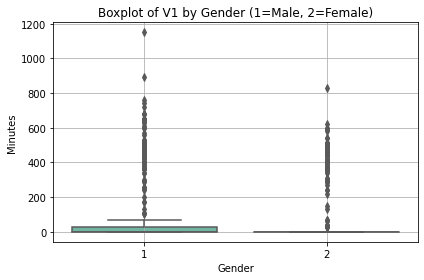

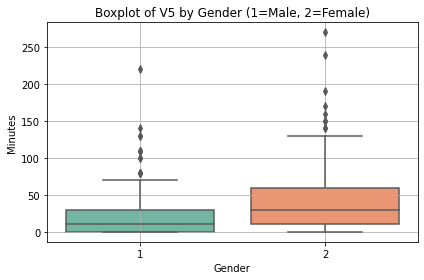

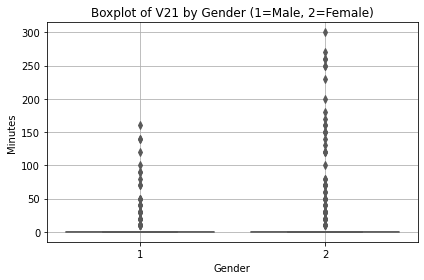

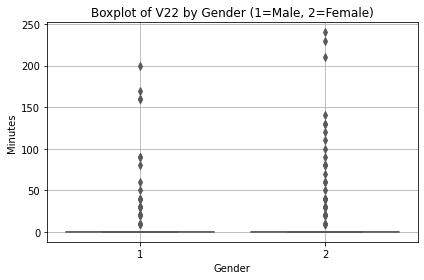

In [37]:
# Boxplots for each activity [6]
for activity in activities: 
    plt.figure(figsize=(6,4))    
    sns.boxplot(x='sp', y = activity, data= df1, palette='Set2')
    plt.grid(True)
    plt.xlabel('Gender')
    plt.ylabel('Minutes')
    plt.title(f'Boxplot of {activity} by Gender (1=Male, 2=Female)')
    plt.tight_layout()
    plt.show()


### Method and Justification
I first confirmed that all four activity variables (V1, V5, V21, V22) were not normally distributed, as shown by the Shapiro-Wilk and Kolmogorov-Smirnov tests above. Also we know that for the case of man vs woman, the data will not be conisired as paired so therefore we used the Mann–Whitney U test, a non-parametric test that does not assume normality, to compare time use between men (sp=1) and women (sp=2).

I also tried to use boxplots used to visually inspect the differences but they don't seem to provide much information.

### Findings
The Mann–Whitney U test revealed significant gender differences in three out of four activities:

1. V1: males spent more time

2. V5 and V21: females spent more time

3. V22: no statistically significant difference


### Conclusion
There are statistically significant gender-based differences in time use for several activities, but only V5 demonstrated a clear and meaningful difference. This highlights the importance of complementing statistical testing with effect size interpretation and visual exploration.



<hr style="height:4px; background-color:#333; border:none;" />


## Question 4: With respect to which activities do living environments differ?

### Objective
This question aimed to assess whether time-use patterns differ across individuals living in urban, semi-urban (municipality), or rural areas (ASALUE).

In [38]:
#listing the activities
activities

['V1', 'V5', 'V21', 'V22']

In [39]:
# Normality checking for variables in activities [8]
for activity in activities:
    for group in [1,2,3]:
        group_data = df1[df1['ASALUE'] == group][activity].dropna()
        stats_shapiro, p_value = shapiro(group_data)
        print(f'Shapiro-Wilk p value for {activity} (ASALUE = {group}): {p_value}')
        
    if p_value < 0.05:
        print(f'{activity} for {group} is NOT normally distributed\n')
    else:
        print(f'{activity} for {group} is normally distributed\n')

Shapiro-Wilk p value for V1 (ASALUE = 1): 2.378017265696314e-34
Shapiro-Wilk p value for V1 (ASALUE = 2): 2.5140314241686346e-18
Shapiro-Wilk p value for V1 (ASALUE = 3): 7.830450338770684e-20
V1 for 3 is NOT normally distributed

Shapiro-Wilk p value for V5 (ASALUE = 1): 5.495685777883687e-26
Shapiro-Wilk p value for V5 (ASALUE = 2): 4.3216066836215816e-10
Shapiro-Wilk p value for V5 (ASALUE = 3): 4.21048206066324e-13
V5 for 3 is NOT normally distributed

Shapiro-Wilk p value for V21 (ASALUE = 1): 5.125529392960883e-41
Shapiro-Wilk p value for V21 (ASALUE = 2): 2.4494672631724858e-20
Shapiro-Wilk p value for V21 (ASALUE = 3): 5.284200866385414e-23
V21 for 3 is NOT normally distributed

Shapiro-Wilk p value for V22 (ASALUE = 1): 1.0400437202218792e-41
Shapiro-Wilk p value for V22 (ASALUE = 2): 7.178489339540136e-22
Shapiro-Wilk p value for V22 (ASALUE = 3): 3.821950227553017e-24
V22 for 3 is NOT normally distributed



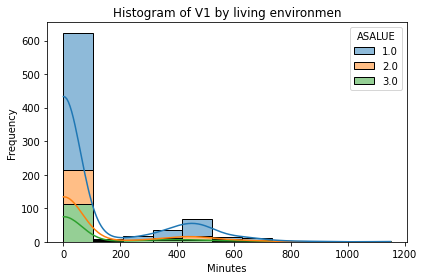

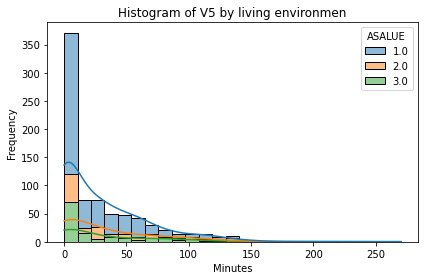

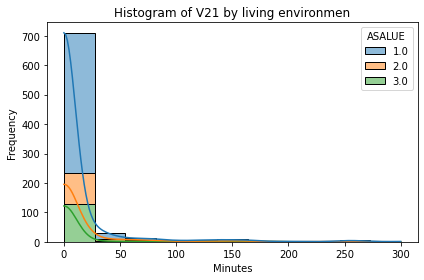

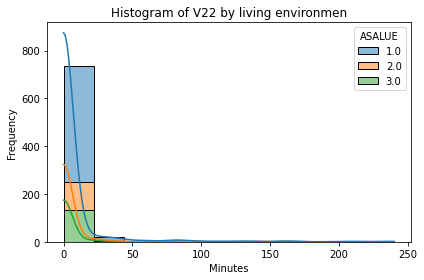

In [40]:
# Visualization for activities by living environment
for activity in activities:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df1, x=activity, hue='ASALUE', multiple='stack', kde=True)
    plt.title(f'Histogram of {activity} by living environmen')
    plt.xlabel('Minutes')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [41]:
print("\n--- Activity Differences by Living Environment (ASALUE) ---\n")

#Since there are three variables which are not normally distributed, we will be using Kruskal-Wallis Test

for activity in activities:
    groups = [df1[df['ASALUE'] == i ][activity].dropna() for i in [1,2,3]]
    mean_of_group = [round(g.mean(), 2) for g in groups]
    stats_kruskal, p_kruskal = kruskal(*groups)
        
    print(f'Activity : {activity}')
    print(f'Mean time spent for (Urban, Municipality, Rural): {mean_of_group}')
    print(f' P-values for Kruskal for {activity} is: {p_kruskal}')
        
    if p_kruskal < 0.05:
        print("→ Statistically significant difference between environments\n")
    else:
        print("→ No statistically significant difference between environments\n")    


--- Activity Differences by Living Environment (ASALUE) ---

Activity : V1
Mean time spent for (Urban, Municipality, Rural): [97.11, 87.1, 72.77]
 P-values for Kruskal for V1 is: 0.4809294159590526
→ No statistically significant difference between environments

Activity : V5
Mean time spent for (Urban, Municipality, Rural): [28.59, 34.19, 31.46]
 P-values for Kruskal for V5 is: 0.2188495434290235
→ No statistically significant difference between environments

Activity : V21
Mean time spent for (Urban, Municipality, Rural): [8.3, 13.95, 7.74]
 P-values for Kruskal for V21 is: 0.017816922078383774
→ Statistically significant difference between environments

Activity : V22
Mean time spent for (Urban, Municipality, Rural): [5.68, 4.44, 3.28]
 P-values for Kruskal for V22 is: 0.37552296031305143
→ No statistically significant difference between environments



### Method and Justification
Given the non-normal distribution of activity variables, we used the Kruskal–Wallis test, a non-parametric alternative compared to ANOVA test for testing differences across three independent groups (ASALUE = 1, 2, 3). The analysis aimed to assess whether time spent on four activities (V1, V5, V21, V22) varied significantly across three living environments: Urban, Municipality, and Rural.

### Findings
For V1 and V5, no statistically significant differences were found across the three environments. Despite slight variations in mean times, these activities appear to be similarly distributed across all living environments. Urban households reported slightly more time on V1, while municipalities reported slightly higher time on V5, but these differences were not meaningful from a statistical standpoint.

In contrast, V21 revealed a statistically significant difference, with households in Municipalities spending more time on this activity compared to both Urban and Rural areas. This suggests that the living environment plays a role in the time spent on this specific activity.

Finally, for V22, no significant differences were observed between the living environments. Urban households spent a bit more time on V22, but this was not statistically significant.

### Conclusion
The findings indicate that living environment influences time spent on V21, but for most other activities (V1, V5, V22), the environment does not significantly affect time allocation.









<hr style="height:4px; background-color:#333; border:none;" />

## Question 5: Which activities are associated with each other?

### Objective
This part of the analysis aimed to determine whether there are statistical associations between different activities — that is, whether time spent on one activity tends to co-occur with time spent on another.

In [42]:
# print activities
activities 

['V1', 'V5', 'V21', 'V22']

In [43]:
# We need to check weather data is normally distributed [5]
print("\n--- Shapiro-Wilk Normality Test ---")
for activity in activities:
    data = df1[activity].dropna()
    stats_of_activities, pvalue_of_activities = shapiro(data)
    print(f'P-value is given by: {pvalue_of_activities} ', end= '')
    if pvalue_of_activities < 0.05:
        print(' -> Not normally Distributed')
    else:
        print('-> Normally Distributed')


--- Shapiro-Wilk Normality Test ---
P-value is given by: 5.220677558688538e-41  -> Not normally Distributed
P-value is given by: 1.926149056534229e-30  -> Not normally Distributed
P-value is given by: 0.0  -> Not normally Distributed
P-value is given by: 0.0  -> Not normally Distributed


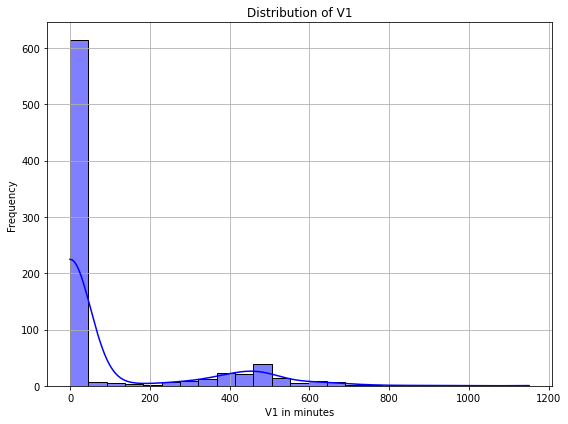

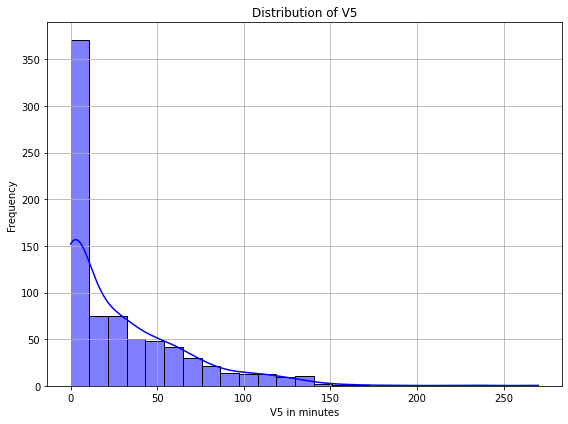

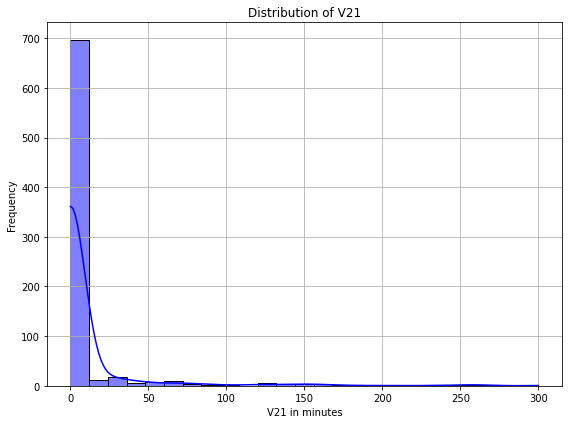

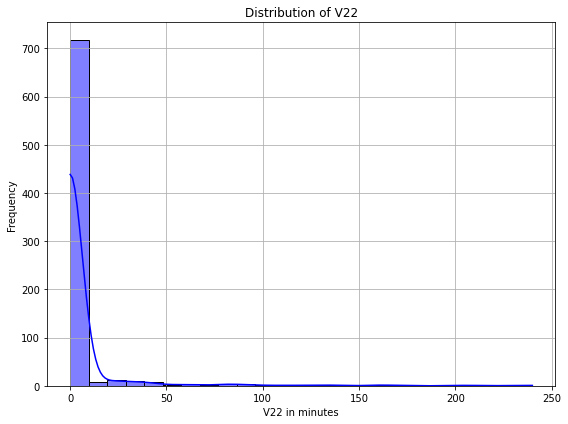

In [44]:
# Just out of curiosity, wanted to see the visualization for the above variables [4]
for activity in activities:
    plt.figure(figsize=(8,6))
    sns.histplot(df1[activity].dropna(), kde=True, bins=25, color='blue', edgecolor='black')
    
    plt.xlabel(f'{activity} in minutes')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {activity}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

We can see that none of the variables are normally distributed, so we will be using Spearman Correlation for identifying association.

In [45]:
# we are going to use spearman correlation as the >>>>>>>>>>>>>>>>
print("\n--- Spearman Correlation Matrix for Activity Variables ---")
activity_data = df1[['V1', 'V5', 'V21', 'V22']]
spearman_coeff = activity_data.corr(method='spearman').round(2)
spearman_coeff


--- Spearman Correlation Matrix for Activity Variables ---


,V1,V5,V21,V22
V1,1.00,-0.13,0.11,-0.03
V5,-0.13,1.00,0.12,0.12
V21,0.11,0.12,1.00,0.67
V22,-0.03,0.12,0.67,1.00


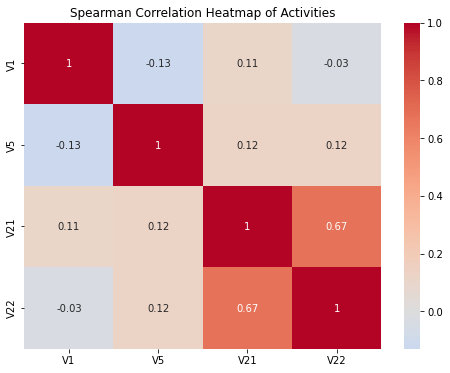

<Figure size 432x288 with 0 Axes>

In [46]:
# heatmap for spearman correlation
plt.figure(figsize=(8,6))
sns.heatmap(spearman_coeff, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap of Activities')

plt.show()
plt.tight_layout()

### Method and Justification
Due to non-normal and skewed distributions as shown above, we used Spearman’s rank correlation to measure monotonic relationships between the four activity variables (V1, V5, V21, V22). Spearman’s correlation is appropriate for non-parametric data and does not assume linearity.

We computed the full correlation matrix and visualized the results using a heatmap.

### Findings
The correlation matrix revealed that most associations between activities were weak, indicating that individuals generally engage in these activities independently of one another:

V1 had a slightly negative correlation with V5 (−0.13) and V22 (−0.03), and a weak positive correlation with V21 (0.11), suggesting no meaningful pattern.

V5 was weakly positively correlated with both V21 and V22 (0.12), but again, the strength of the relationship is minimal.

The only notable association was between V21 and V22, which had a moderate positive correlation of 0.67, suggesting that individuals who spend time on one of these activities are also likely to engage in the other. These two may represent related or complementary leisure or cultural activities.

### Conclusion
The analysis reveals that most activity pairs show weak or negligible correlations, suggesting that individuals generally allocate their time to these activities independently. However, a noteworthy exception is the moderate positive correlation (0.67) between V21 (childcare tasks) and V22 (reading and playing with children). This indicates that individuals who spend more time on general childcare are also more likely to engage in nurturing and interactive activities with children. This co-occurrence may reflect a broader behavioural pattern of active parental or caregiving involvement, where routine care is complemented by emotionally or cognitively engaging time. Overall, while time-use patterns appear largely individualised, specific thematic associations—such as those related to childcare—can be meaningfully observed.



<hr style="height:4px; background-color:#333; border:none;" />

# Final Summary and Conclusion [9]

In this project, I worked with time-use survey data to understand how individuals and households spend their time on different daily activities and whether these behaviours vary across demographic groups. The analysis was structured around five specific questions, each addressed using appropriate methods based on the nature of the data.

1. Characterising Individuals and Identifying Groups
To examine whether the dataset includes groups of similar individuals, I focused on age (IKAL1), gender (sp), and living environment (ASALUE). I used Principal Component Analysis (PCA) to reduce dimensionality and visualise structure, and K-means clustering to identify groupings. The results showed three clear demographic clusters: one of urban females, one of urban males, and a rural group with mixed gender. This confirmed that individuals do form distinct demographic groups based on these features.

2. Estimating Time Use Across Activities
I calculated household-level average daily time spent on four activities (V1, V5, V21, V22). The results varied widely, especially for V1, where some households reported no time and others reported very high values. Activities like V5 had more consistent responses. Because of this skewness and zero-inflation, I used both mean and median values to summarise time use more accurately.

3. Gender Differences in Activities
Using the Mann–Whitney U test, I compared activity times between males and females. Statistically significant differences were found for V1, V5, and V21. Males spent more time on V1, while females spent more time on V5 and V21. There was no significant difference for V22. These results point to expected gender patterns, especially in household and caregiving activities.

4. Activity Differences by Living Environment
I then tested whether time-use patterns differed between urban, municipal, and rural areas using the Kruskal–Wallis test. Only V21 (childcare) showed a statistically significant difference: households in municipalities reported spending more time on it compared to urban or rural areas. No significant differences were found for the other activities, suggesting that most time-use behaviour is not strongly driven by living environment.

5. Associations Between Activities
Lastly, I used Spearman correlation to assess how different activities relate to one another. Most activity pairs were weakly correlated, which means they tend to occur independently. However, there was a moderate positive correlation between V21 (childcare) and V22 (reading/playing with children). This suggests that people who are engaged in routine childcare are also more likely to spend interactive or nurturing time with children.

### Conclusion [9]
Overall, the project shows that while some time-use behaviours are shaped by demographics like gender and environment, a large part of how people spend their time remains quite individual. The analysis used non-parametric methods due to non-normal and zero-inflated distributions, and visual tools like boxplots and KDE plots helped interpret the results clearly. Each step connected statistical reasoning to real-world patterns, offering a practical understanding of time allocation in daily life.




## References

1. https://scikit-learn.org/stable/modules/clustering.html#k-means
2. https://builtin.com/machine-learning/pca-in-python
3. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
4. https://seaborn.pydata.org/generated/seaborn.histplot.html
5. https://www.w3schools.com/python/ref_func_print.asp
6. https://seaborn.pydata.org/generated/seaborn.boxplot.html
7. https://www.w3schools.com/python/pandas/ref_df_agg.asp
8. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
9. https://chatgpt.com/ *

#### * AI Use Declaration
I have used generative AI (ChatGPT 40) only for summarising the final summary and conclusion section of the report. The reason for this was that the section had become too long and difficult to structure properly. I used AI assistance to help condense the content and create a more coherent and readable ending.